In [1]:

# CPU USAGE

import multiprocessing

num_cores = multiprocessing.cpu_count()
cores_you_need_to_be_free = 2
cores_to_use = num_cores - cores_you_need_to_be_free
print('cores available:', num_cores,
      '\ncores to be used:', cores_to_use
     )

cores available: 8 
cores to be used: 6


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Read data

In [3]:
bike_train = pd.read_csv('~/spiced/nigela-network-encounter-notes/week_03/data/train.csv',index_col=0, parse_dates=True)
bike_test = pd.read_csv('~/spiced/nigela-network-encounter-notes/week_03/data/test.csv')
# index_col : which column number to take as index
# parse_dates = True : convert the index to datetim

# Data Exploration

In [4]:
bike_train.shape, bike_test.shape

((10886, 11), (6493, 9))

In [5]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [6]:
bike_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
#Check values for categorical

In [8]:
bike_train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [9]:
bike_train['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [10]:
bike_train['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [11]:
bike_train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [12]:
#drop rows where weather has value 4
bike_train = bike_train.drop(bike_train[bike_train['weather'] == 4].index)

In [13]:
#print weather value equal 4
print(bike_train[bike_train['weather'] == 4])

Empty DataFrame
Columns: [season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []


##Convert a column to datetime 
#Assign index as datetime column in case index column and sparse_date are not define when reading the file
bike_train['datetime'] = pd.to_datetime(bike_train['datetime'])
bike_train.index = bike_train['datetime']

In [14]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10885 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10885 non-null  int64  
 1   holiday     10885 non-null  int64  
 2   workingday  10885 non-null  int64  
 3   weather     10885 non-null  int64  
 4   temp        10885 non-null  float64
 5   atemp       10885 non-null  float64
 6   humidity    10885 non-null  int64  
 7   windspeed   10885 non-null  float64
 8   casual      10885 non-null  int64  
 9   registered  10885 non-null  int64  
 10  count       10885 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.5 KB


In [15]:
bike_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [16]:
#Extract month-day-year-and hour from datetime

In [17]:
#Define date format 
my_str = "06.03.2023 10:29"

In [18]:
#create timestamp using date defined in my_str
my_dt = datetime.strptime(my_str, '%d.%m.%Y %H:%M')
my_dt

datetime.datetime(2023, 3, 6, 10, 29)

In [19]:
#extract days-month-year-hour and add as new column in the dataframe

In [20]:
#bike_train['day'] = bike_train.index.day

In [21]:
bike_train['month'] = bike_train.index.month

In [22]:
bike_train['year'] = bike_train.index.year

In [23]:
bike_train['hour'] = bike_train.index.hour

In [24]:
#bike_train['weekday'] = bike_train.index.weekday

In [25]:

bike_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,4


In [26]:
#check missin value
bike_train.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
day           0
month         0
year          0
hour          0
dtype: int64

#Linear relationship
#Plot all the features against the target value Y:
sns.pairplot(bike_train.drop(columns=['weather','hour', 'day']))
plt.show()

In [27]:
#Make sure that your input features X do not only have a single value.
bike_train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered', 'count' ,'month','year','hour']].nunique()

season          4
holiday         2
workingday      2
weather         3
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
month          12
year            2
hour           24
dtype: int64

## Plot different features

Text(0.5, 1.0, 'Monthly count')

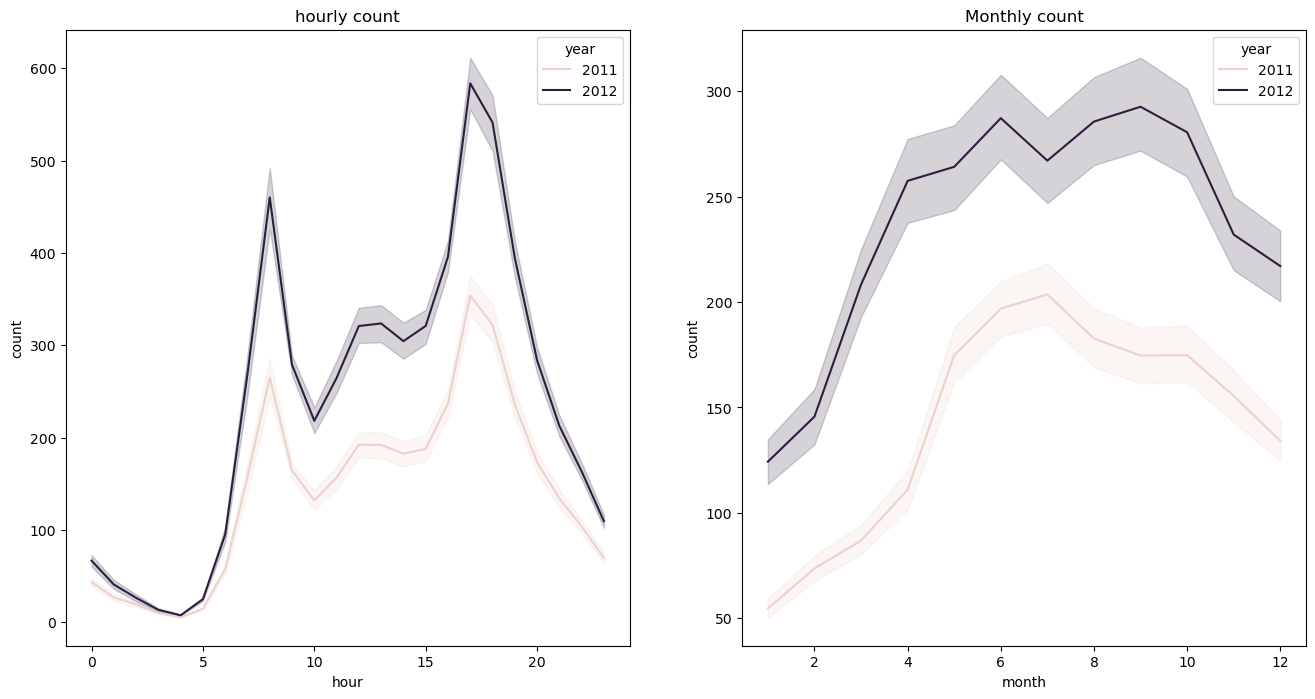

In [28]:
# average number of bike rent per month
#plt.figure()
#sns.lineplot(data=bike_train, x='month', y='count', hue='year') # or x=bike_train.index.dt.month or x=bike_train['datetime'].dt.month
#plt.grid()
fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.lineplot(ax=axes[0], data=bike_train, x='hour', y='count', hue='year')
axes[0].set_title('hourly count', fontsize=12, loc = 'center', wrap=True)
#sns.lineplot(ax=axes[1], data=bike_train, x='day', y='count', hue='year')
#axes[1].set_title('weekly count', fontsize=12, loc = 'center', wrap=True)
sns.lineplot(ax=axes[1], data=bike_train, x='month', y='count', hue='year')
axes[1].set_title('Monthly count', fontsize=12, loc = 'center', wrap=True)

In [29]:
#resample by month
s_data=bike_train.resample('M').mean()
s_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
datetime,,,,,,,,,,,,,,,
2011-01-31,1.0,0.055684,0.612529,1.440835,8.633782,10.767981,56.308585,13.749830,4.658933,49.986079,54.645012,9.825986,1.0,2011.0,11.914153
2011-02-28,1.0,0.000000,0.733184,1.378924,11.331076,13.999922,53.580717,15.509298,8.466368,65.174888,73.641256,10.015695,2.0,2011.0,11.677130
2011-03-31,1.0,0.000000,0.735426,1.466368,14.063184,16.895594,55.923767,16.033866,17.735426,69.114350,86.849776,9.955157,3.0,2011.0,11.683857
2011-04-30,2.0,0.052747,0.630769,1.619780,17.776879,21.239835,66.285714,15.844234,26.876923,84.149451,111.026374,9.997802,4.0,2011.0,11.518681
2011-05-31,2.0,0.000000,0.736842,1.528509,21.528596,25.455143,71.421053,12.355358,34.791667,140.017544,174.809211,10.000000,5.0,2011.0,11.500000
2011-06-30,2.0,0.000000,0.684211,1.278509,28.191096,32.150910,58.291667,11.930099,42.982456,153.894737,196.877193,10.000000,6.0,2011.0,11.500000
2011-07-31,3.0,0.052632,0.631579,1.184211,29.967763,34.011656,60.403509,11.960793,57.335526,146.278509,203.614035,10.000000,7.0,2011.0,11.500000
2011-08-31,3.0,0.000000,0.789474,1.344298,29.667456,33.461711,62.166667,12.480543,38.552632,144.114035,182.666667,10.000000,8.0,2011.0,11.500000
2011-09-30,3.0,0.052980,0.629139,1.618102,25.141236,28.693256,74.830022,11.501445,40.421634,134.200883,174.622517,10.008830,9.0,2011.0,11.562914


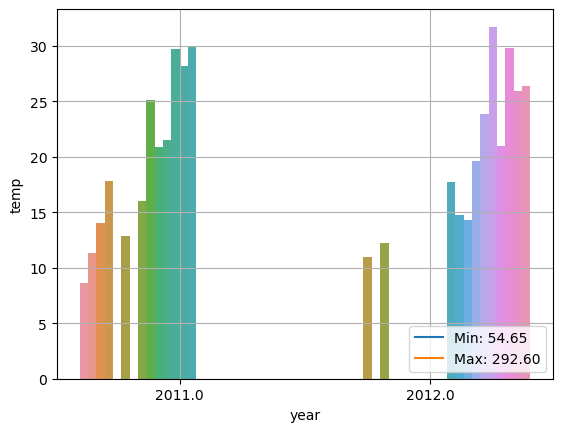

In [30]:
# monthly average
mins=s_data['count'].min()
maxs=s_data['count'].max()
fig, ax =plt.subplots()
sns.barplot(data=s_data, x='year', y='temp', hue='count') # or x=bike_train.index.dt.month or x=bike_train['datetime'].dt.month
handles = [plt.plot([], [],  label=f'Min: {mins:.2f}')[0],
           plt.plot([], [], label=f'Max: {maxs:.2f}')[0]]
plt.legend(handles=handles, labels=[handle.get_label() for handle in handles], loc='lower right')
plt.grid()
plt.show()

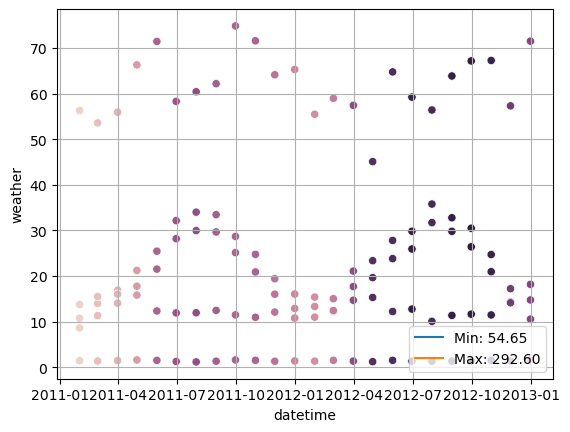

In [31]:
# monthly average
mins=s_data['count'].min()
maxs=s_data['count'].max()
fig, ax =plt.subplots()
sns.scatterplot(data=s_data, x=s_data.index, y='weather', hue='count', label='weather') # or x=bike_train.index.dt.month or x=bike_train['datetime'].dt.month
sns.scatterplot(data=s_data, x=s_data.index, y='temp', hue='count', label='temperatur')
sns.scatterplot(data=s_data, x=s_data.index, y='atemp', hue='count', label='air temperatur')
sns.scatterplot(data=s_data, x=s_data.index, y='humidity', hue='count', label='humidity')
sns.scatterplot(data=s_data, x=s_data.index, y='windspeed', hue='count', label='windspeed')
handles = [plt.plot([], [],  label=f'Min: {mins:.2f}')[0],
           plt.plot([], [], label=f'Max: {maxs:.2f}')[0]]
plt.legend(handles=handles, labels=[handle.get_label() for handle in handles], loc='lower right')
plt.grid()
plt.show()

fig, axes = plt.subplots(2,2 , figsize=(16,8))
#sns.scatterplot(ax=axes[0,0], x='Pclass', y='Age', data=data, hue='Survived')
sns.scatterplot(ax=axes[0,0], x='weather', y='temp', data=s_data, hue='count')
axes[0,0].set_title('weather vs temp', fontsize=12, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[0,1], x='weather', y='humidity', data=s_data, hue='count')
axes[0,1].set_title('weather vs humidity', fontsize=12, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[1,0], x='weather', y='windspeed', data=s_data, hue='count')
axes[1,0].set_title('weather vs windspeed', fontsize=12, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[1,1], x='weather', y='atemp', data=s_data, hue='count')
axes[1,1].set_title('weather vs air temperatur', fontsize=12, loc = 'center', wrap=True)

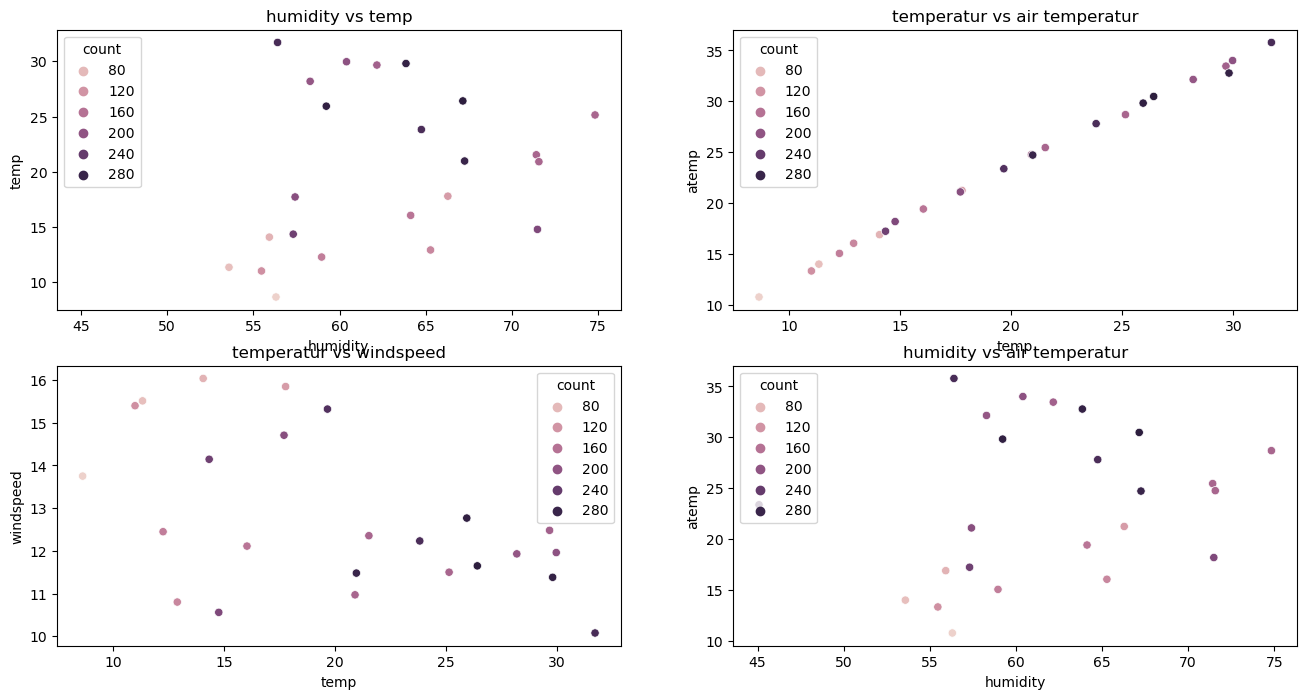

In [32]:
fig, axes = plt.subplots(2,2 , figsize=(16,8))
#sns.scatterplot(ax=axes[0,0], x='Pclass', y='Age', data=data, hue='Survived')
sns.scatterplot(ax=axes[0,0], x='humidity', y='temp', data=s_data, hue='count')
axes[0,0].set_title('humidity vs temp', fontsize=12, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[0,1], x='temp', y='atemp', data=s_data, hue='count')
axes[0,1].set_title('temperatur vs air temperatur', fontsize=12, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[1,0], x='temp', y='windspeed', data=s_data, hue='count')
axes[1,0].set_title('temperatur vs windspeed', fontsize=12, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[1,1], x='humidity', y='atemp', data=s_data, hue='count')
axes[1,1].set_title('humidity vs air temperatur', fontsize=12, loc = 'center', wrap=True)
plt.show()

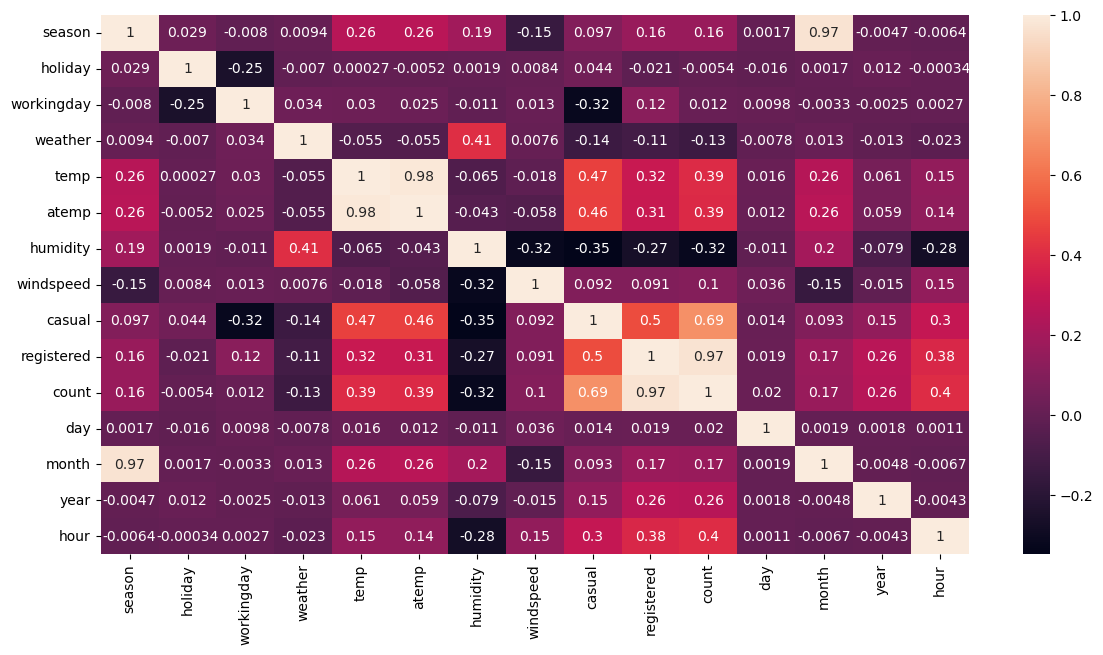

In [33]:
fig = plt.figure(figsize=(14, 7))
sns.heatmap(bike_train.corr(), annot=True)
plt.show()

# LinearRegression

In [34]:
#model with linearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,  mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import set_config
import sklearn
from sklearn.model_selection import cross_val_score
set_config(display="diagram") ###displays diagram from the output of the column/feature transformation
set_config(transform_output="pandas")

In [35]:
##Define X and y
y=bike_train['count']
X=bike_train.drop(columns=['count', 'casual', 'registered'], axis=1)

In [36]:
## Split data
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 12), (2177, 12), (8708,), (2177,))

In [37]:
#X_train=bike_train.drop(columns=['casual','registered','count'])

In [38]:
#y_train=bike_train['count']

In [39]:
##Features engineering 


In [40]:
##drop atemp column --- colinearity with temp data
X_train.drop('atemp', axis=1)
X_test.drop('atemp', axis=1)

,season,holiday,workingday,weather,temp,humidity,windspeed,day,month,year,hour
datetime,,,,,,,,,,,
2011-07-19 11:00:00,3,0,1,1,33.62,59,0.0000,19,7,2011,11
2012-01-16 06:00:00,1,1,0,1,4.10,54,6.0032,16,1,2012,6
2012-05-10 04:00:00,2,0,1,1,18.86,77,12.9980,10,5,2012,4
2012-08-15 10:00:00,3,0,1,2,29.52,62,12.9980,15,8,2012,10
2012-11-12 03:00:00,4,1,0,1,16.40,76,8.9981,12,11,2012,3
...,...,...,...,...,...,...,...,...,...,...,...
2012-02-09 23:00:00,1,0,1,2,12.30,52,0.0000,9,2,2012,23
2011-05-08 17:00:00,2,0,0,3,23.78,49,19.0012,8,5,2011,17
2012-01-17 05:00:00,1,0,1,3,13.12,66,22.0028,17,1,2012,5


In [41]:
#column transformation

In [42]:
##Categorical data
cat_pipe = make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse=False)) # transform categorical features
                         

In [43]:
##Numerical data
num_pipe = make_pipeline(StandardScaler()) # scale numerical feature

In [44]:
#Tansform the column features of the data
column_transform = ColumnTransformer(     
    transformers=[
        ("num", num_pipe, ['temp', 'humidity', 'windspeed']),
        ("cat", cat_pipe, ['season', 'weather', 'hour',  'month', 'year']), # month and day are categorical
        ("do_nothing", 'passthrough', ['holiday','workingday'])
    ]

)


In [45]:
# create pipeline
pipeline = make_pipeline(column_transform, LinearRegression())

In [46]:
#feed our data to transform and train the model
pipeline.fit(X_train, y_train)


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['season', 'weather', 'hour',
                                                   'month', 'year']),
                                                 ('do_nothing', 'passthrough',
                                                  ['holiday', 'workingday'])])),
                ('linearregression', LinearRegression())])

In [47]:
# get predictions from the pipeline
y_pred = pipeline.predict(X_test)

In [48]:
#Check score / accuracy of the model 

In [49]:
#train data
pipeline.score(X_train, y_train)

0.6943200619422447

In [50]:
#check model score using test data
pipeline.score(X_test, y_test)

0.6882721084766297

In [51]:
## coef of determination
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.6882721084766297

## cross validation LinRegression

In [52]:
### cross validation linRegressionn
cross_r2_reg = cross_val_score(pipeline,  #the model that we want to evaluate
                               
                               X_train, # X_train data
                               y_train,    # ytrain
                               cv=5,      # the number of folds that you want
                               scoring ='r2',  # the metric that you want to evaluate
                               verbose=3)  # this prints our progress, more information

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_

[CV] END ................................ score: (test=0.648) total time=   0.1s
[CV] END ................................ score: (test=0.699) total time=   0.0s
[CV] END ................................ score: (test=0.696) total time=   0.0s
[CV] END ................................ score: (test=0.710) total time=   0.0s
[CV] END ................................ score: (test=0.697) total time=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [53]:
cross_r2_reg

array([0.64776928, 0.69862992, 0.69557407, 0.70983863, 0.6968217 ])

In [54]:
cross_r2_reg.mean()

0.6897267228791243

In [55]:
#estimate residuals 
residuals = y_test - y_pred

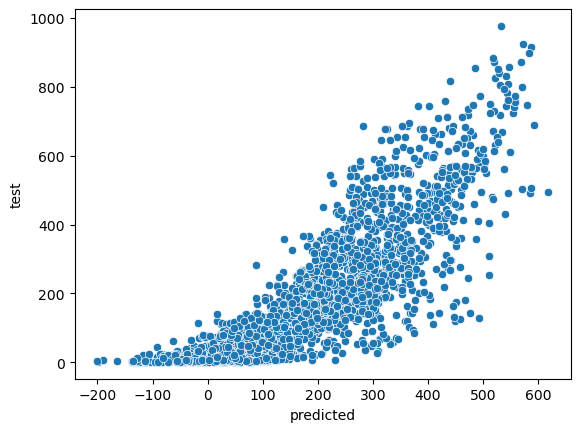

In [56]:
# scatterplot of predicted
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel('predicted')
plt.ylabel('test')
plt.show()

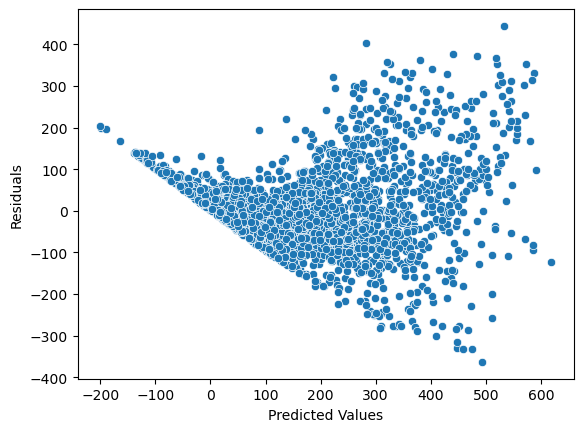

In [57]:
#plot residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Feature Expansion

## Linear regression

In [58]:
from sklearn.preprocessing import PolynomialFeatures

##feature expansion of train data
poly_pipe = make_pipeline(PolynomialFeatures(degree=3, interaction_only=False, include_bias=False), #degree higher than 2 >> overfitting patterns
                         )

##Polynomial_transformation
poly_transform = ColumnTransformer(      
    transformers=[
        ("pol", poly_pipe, ['temp','humidity', 'windspeed', 'season', 'holiday' 'weather','workingday', 'hour', 'day', 'month', 'year']),
        #("do_nothing", 'passthrough', ),
    ]
)

## feature expansion with regularization

## Lasso

###  grid search to find the best value for alpha

In [59]:
from sklearn.model_selection import GridSearchCV

alpha_range = np.logspace(-5, 1) ## search for value between 10^(-5) and 10
param_grid = {'alpha': alpha_range}
grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468e-04, 6.86648845e-04,
       9.10298178e-04, 1.20679264e-03, 1.59985872e-03, 2....
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error')

In [60]:
alpha_range

array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468e-04, 6.86648845e-04,
       9.10298178e-04, 1.20679264e-03, 1.59985872e-03, 2.12095089e-03,
       2.81176870e-03, 3.72759372e-03, 4.94171336e-03, 6.55128557e-03,
       8.68511374e-03, 1.15139540e-02, 1.52641797e-02, 2.02358965e-02,
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01])

In [61]:
print("Best alpha value:", grid.best_params_['alpha'])
print("Test MSE:", -grid.score(X_test, y_test))

Best alpha value: 0.5963623316594636
Test MSE: 20736.64739922714


### Lasso pipeline

In [62]:
linReg_pipe = Pipeline([
    ('column_transform', column_transform),
     ('poly_expansion', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)), 
      ('linreg', Lasso(alpha=0.0002))
])

In [63]:
linReg_pipe.fit(X_train, y_train)

/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.118e+06, tolerance: 2.829e+04
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['season', 'weather', 'hour',
                                                   'month', 'year']),
                                                 ('do_nothing', 'passthrough',
                                                  ['holiday', 'workingday'])])),
                ('poly_expansion', PolynomialFeatures(include_bias=False)),
                ('linreg', Lasso(alpha=0.0002))])

In [64]:
linReg_pipe.score(X_train, y_train)

0.9300604423625971

In [65]:
linReg_pipe.score(X_test, y_test)

0.9123865592691466

In [66]:
### cross validation Ridge
cross_r2_linreg = cross_val_score(linReg_pipe,  #the model that we want to evaluate
                               
                               X_train, # X_train data
                               y_train,    # ytrain
                               cv=5,      # the number of folds that you want
                               scoring ='r2',  # the metric that you want to evaluate
                               n_jobs=cores_to_use,
                               verbose=3)  # this prints our progress, more information

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders

In [67]:
cross_r2_linreg

array([0.90992838, 0.9144997 , 0.92460432, 0.91250517, 0.91992628])

In [68]:
cross_r2_linreg.mean()

0.916292770563192

## Prediction

In [69]:
y_predict = linReg_pipe.predict(X_test)

## Plot Predited vs Test data

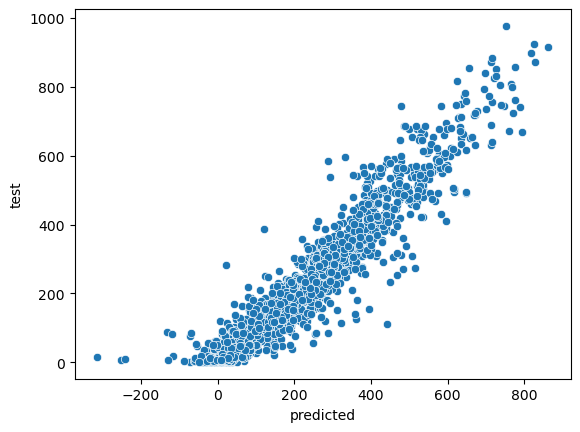

In [70]:
# scatterplot of predicted
sns.scatterplot(x=y_predict, y=y_test)
plt.xlabel('predicted')
plt.ylabel('test')
plt.show()

## Handle predicted negative values 

In [71]:
##Transform y to prevent negativ value of prediction

In [72]:
#log Y_train --linear Regression
y_train_log = np.log1p(y_train) 

In [73]:
#fit the model  --linear Regression
linReg_pipe.fit(X_train , y_train_log)

/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['season', 'weather', 'hour',
                                                   'month', 'year']),
                                                 ('do_nothing', 'passthrough',
                                                  ['holiday', 'workingday'])])),
                ('poly_expansion', PolynomialFeatures(include_bias=False)),
                ('linreg', Lasso(alpha=0.0002))])

In [74]:
#make prediction --linear Regression
y_pd_log = linReg_pipe.predict(X_test)

In [75]:
y_pd_log

array([4.96642749, 2.53078572, 1.97966013, ..., 2.50764608, 2.46820531,
       1.74851464])

In [76]:
 # transform back! --linear Regression
y_pred = np.expm1(y_pd_log) 

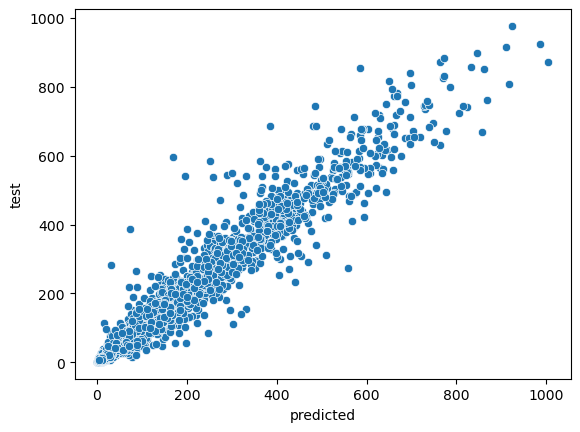

In [77]:
# scatterplot of predicted
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel('predicted')
plt.ylabel('test')
plt.show()

In [78]:
#Residuals 
resid = y_pred - y_test


<AxesSubplot:>

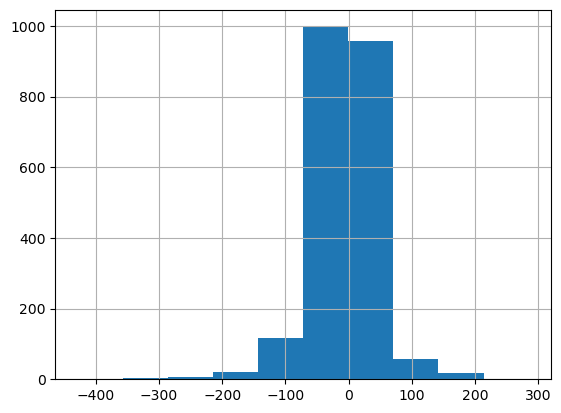

In [79]:
#hist
resid.hist()

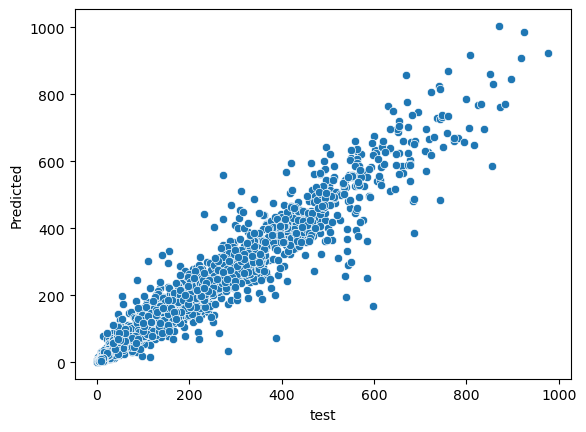

In [80]:
# scatterplot of residuals
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('test')
plt.ylabel('Predicted')
plt.show()

## Check RMSLE 

In [81]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.3233407515060179

## Ridge

In [82]:
ridge_pipe = Pipeline([
    ('column_transform', column_transform),
     ('poly_expansion', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)), 
      ('ridge', Ridge(alpha=0.2))
])   

In [83]:
ridge_pipe.fit(X_train, y_train)

/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['season', 'weather', 'hour',
                                                   'month', 'year']),
                                                 ('do_nothing', 'passthrough',
                                                  ['holiday', 'workingday'])])),
                ('poly_expansion', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=0.2))])

In [84]:
ridge_pipe.score(X_train, y_train)

0.9300568913514984

In [85]:
ridge_pipe.score(X_test, y_test)

0.9124293102798049

In [86]:
### cross validation Ridge
cross_r2_ridge = cross_val_score(ridge_pipe,  #the model that we want to evaluate
                               
                               X_train, # X_train data
                               y_train,    # ytrain
                               cv=5,      # the number of folds that you want
                               scoring ='r2',  # the metric that you want to evaluate
                               verbose=3)  # this prints our progress, more informatio

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ................................ score: (test=0.910) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ................................ score: (test=0.915) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ................................ score: (test=0.925) total time=   0.3s


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ................................ score: (test=0.913) total time=   0.4s


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ................................ score: (test=0.920) total time=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


In [87]:
cross_r2_ridge 

array([0.91004029, 0.91458849, 0.92468127, 0.91253214, 0.92002136])

In [88]:
cross_r2_ridge .mean()

0.9163727090176875

In [89]:
y_ridge = ridge_pipe.predict(X_test)

In [90]:
#residuals 
res = y_ridge - y_test

<AxesSubplot:>

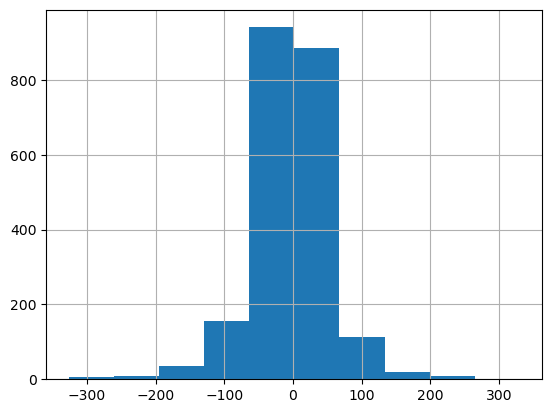

In [91]:
res.hist()

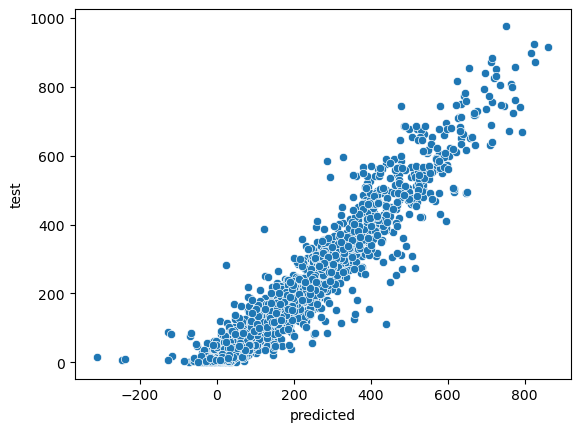

In [92]:
# scatterplot of predicted
sns.scatterplot(x=y_ridge, y=y_test)
plt.xlabel('predicted')
plt.ylabel('test')
plt.show()

## Ridge - Handle negative output

In [93]:
ridge_pipe.fit(X_train, y_train_log)

/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['season', 'weather', 'hour',
                                                   'month', 'year']),
                                                 ('do_nothing', 'passthrough',
                                                  ['holiday', 'workingday'])])),
                ('poly_expansion', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=0.2))])

In [94]:
y_rid_log = ridge_pipe.predict(X_test)

In [95]:
 # transform back! --linear Regression
y_pd_rid = np.expm1(y_rid_log) 

In [96]:
ridg_residu = y_pd_rid - y_test

<AxesSubplot:>

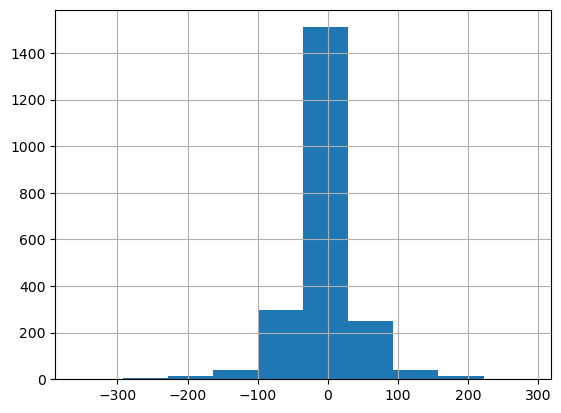

In [97]:
ridg_residu.hist()

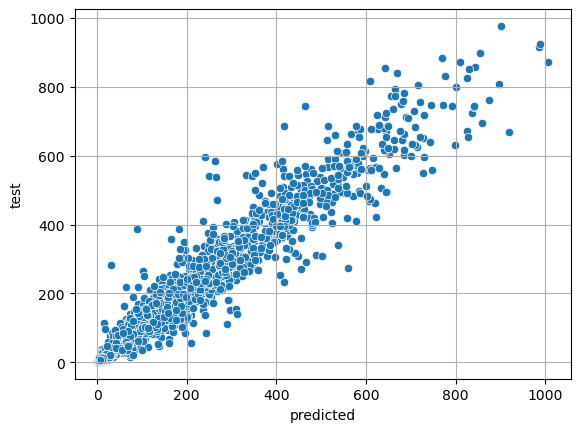

In [98]:
# scatterplot of predicted
sns.scatterplot(x=y_pd_rid, y=y_test)
plt.xlabel('predicted')
plt.ylabel('test')
plt.grid()
plt.show()

## Kaggle Test 

## -- test data

In [99]:
Xtest = pd.read_csv('~/spiced/nigela-network-encounter-notes/week_03/data/test.csv',index_col=0, parse_dates=True)
Xtest.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [100]:
Xtest['weather'].value_counts()

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

In [101]:
Xtest=Xtest.drop(Xtest[Xtest['weather']==4].index)

In [102]:
Xtest['weather'].value_counts()

1    4221
2    1710
3     560
Name: weather, dtype: int64

In [103]:
#Xtest['day']=Xtest.index.day
Xtest['month']=Xtest.index.month
Xtest['year']=Xtest.index.year
Xtest['hour']=Xtest.index.hour
#Xtest['weekday']=Xtest.index.weekday

In [104]:
# drop atemp column
Xtest = Xtest.drop('atemp', axis=1)
Xtest.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,day,month,year,hour
datetime,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,56,26.0027,20,1,2011,0
2011-01-20 01:00:00,1,0,1,1,10.66,56,0.0000,20,1,2011,1
2011-01-20 02:00:00,1,0,1,1,10.66,56,0.0000,20,1,2011,2
2011-01-20 03:00:00,1,0,1,1,10.66,56,11.0014,20,1,2011,3
2011-01-20 04:00:00,1,0,1,1,10.66,56,11.0014,20,1,2011,4


In [105]:
y_log= linReg_pipe.predict(Xtest)

In [106]:
#linReg_pipe.score(Xtest, y_log)

In [107]:
#y_log = np.expm1(y_log) 
y_log

array([2.47458802, 1.7830744 , 1.27150985, ..., 4.84542156, 4.57061641,
       4.13088487])

In [108]:
kaggle_bike = pd.DataFrame({'datetime':Xtest.index, 'count' :np.expm1(y_log)  })

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

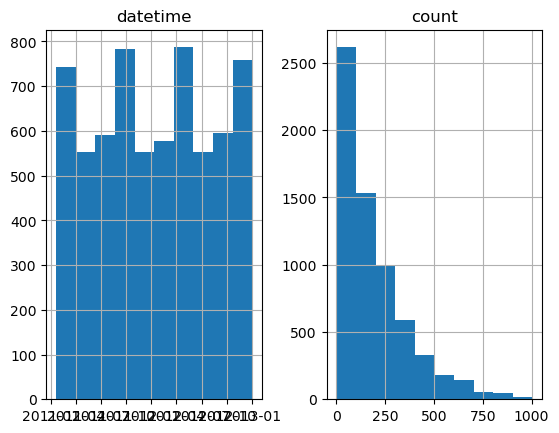

In [109]:
kaggle_bike.hist()

In [78]:
#kaggle_bike.to_csv('~/spiced/nigela-network-encounter-notes/week_03/data/bike_linreg.csv', index = False)

##Transform features using polynome transformer
#Transform train data
X_train_poly= poly_transform.fit_transform(X_train)

#transform test data
X_test_poly = poly_transform.transform(X_test)


#X_train_feat = pol_feat.fit_transform(X_train_trans)

##transform test data

##X_test_feat = pol_feat.transform(X_test_trans)

##linear regression 
m = LinearRegression()

m.fit(X_train_poly , y_train)

#train data score _linear Regression
m.score(X_train_poly, y_train)

#test data_score _linear Regression
m.score(X_test_poly, y_test)

## TransformedTargetRegressor

In [107]:

####The TransformedTargetRegressor class allows you to apply a transformer to the target variable, 
#to transform the target variable to a more normal distribution or 
#to a scale that is more suitable for the regression model.


In [108]:
from sklearn.compose import TransformedTargetRegressor

In [109]:
ttr_pipe = Pipeline([
    ('column_transform', column_transform),
     ('poly_expansion', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)), 
      ('ttr', TransformedTargetRegressor(regressor=LinearRegression(),
                                func=np.log1p, inverse_func=np.expm1))
]) 


In [110]:
##fit the model
ttr_pipe.fit(X_train, y_train)


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['season', 'holiday',
                                                   'workingday', 'weather',
                                                   'hour', 'day', 'month',
                                                   'year'])])),
                ('poly_expansion', PolynomialFeatures(include_bias=False)),
                ('ttr',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [111]:
ttr_pipe.score(X_train, y_train)

0.9444420782734476

In [112]:
ttr_pipe.score(X_test, y_test)

0.9192950220696992

In [113]:
#do prediction

In [114]:
y_p=ttr_pipe.predict(X_test)

In [115]:
#check score
r2_score(y_test, y_p, multioutput='variance_weighted')

0.919295022069699

In [116]:
#residuals
ttr_residual = y_p - y_test

<AxesSubplot:>

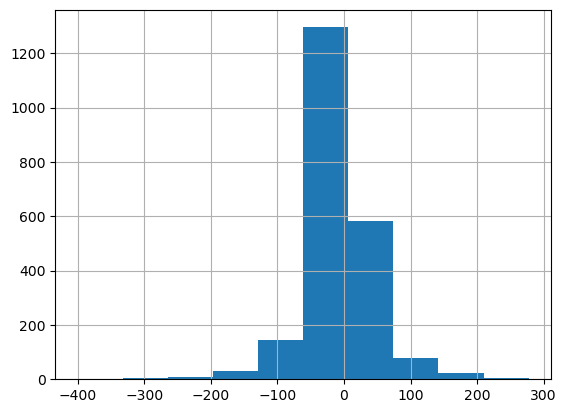

In [117]:
ttr_residual.hist()

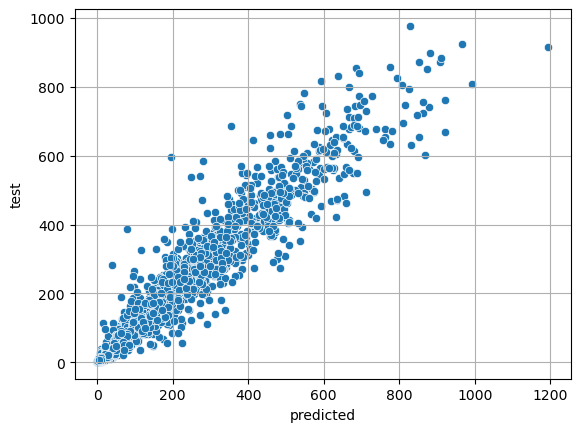

In [118]:
# scatterplot of predicted
sns.scatterplot(x=y_p, y=y_test)
plt.xlabel('predicted')
plt.ylabel('test')
plt.grid()
plt.show()

## PoissonRegressor

In [92]:
from sklearn.linear_model import PoissonRegressor

In [93]:
pr_pipe = Pipeline([
    ('column_transform', column_transform),
     ('poly_expansion', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)), 
      ('pr', PoissonRegressor())
]) 


In [94]:
pr_pipe.fit(X_train, y_train)


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['season', 'holiday',
                                                   'workingday', 'weather',
                                                   'hour', 'day', 'month',
                                                   'year'])])),
                ('poly_expansion', PolynomialFeatures(include_bias=False)),
                ('pr', PoissonRegressor())])

In [95]:
y_prd = pr_pipe.predict(X_test)

In [96]:
r2_score(y_test, y_prd, multioutput='variance_weighted')

0.9298081093245185

In [97]:
pr_residual = y_prd - y_test

<AxesSubplot:>

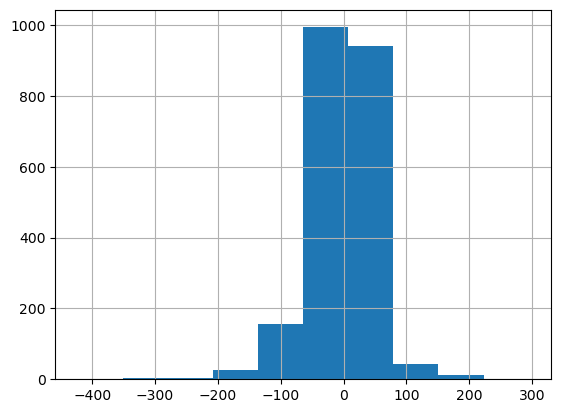

In [98]:
pr_residual.hist()

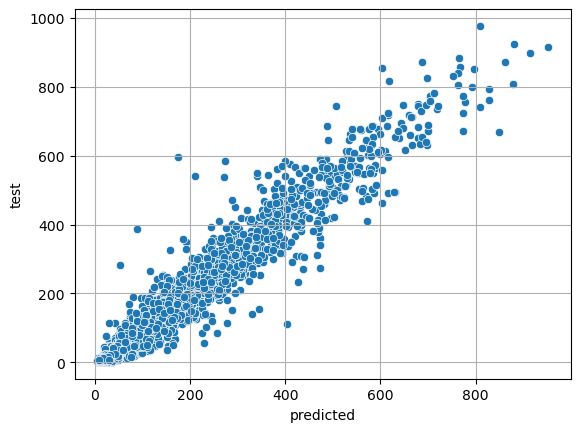

In [99]:
# scatterplot of predicted
sns.scatterplot(x=y_prd, y=y_test)
plt.xlabel('predicted')
plt.ylabel('test')
plt.grid()
plt.show()

## Check RMSLE 

In [100]:
np.sqrt(mean_squared_log_error(y_test, y_prd))

0.5416454837304301

# Paramater optimatization 
##-- search best parameters for Random Forest Regressor

## RandomForestRegressor

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## RandomForestRegressor built in pipeline

In [129]:
##create a pipeline for random forest
rfr_pipe =Pipeline([
    ('column_transform', column_transform),
     #('poly_expansion', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)), 
    ('Grid_cv', GridSearchCV(estimator=RandomForestRegressor(), param_grid=({ 'n_estimators' : [2 ** i for i in range(3, 9)],'max_depth': [2, 4, 8, 16, 32, None]}), 
                             n_jobs=cores_to_use, cv=5, scoring='r2', verbose = 3))
]) 


In [130]:
# fit and train the model
rfr_pipe.fit(X_train, y_train)

/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['season', 'holiday',
                                                   'workingday', 'weather',
                                                   'hour', 'day', 'month',
                                                   'year'])])),
                ('Grid_cv',
                 GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=6,
                              param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                                          'n_estimators': [8, 16, 32, 64, 128,
                                                           256]},
                              scoring='r2', verbose=3))])

In [131]:
#Get the best hyperparameters
#grid_cv.best_params_ 

In [132]:
#cross validation
cross_r2_rfr = cross_val_score(rfr_pipe,  #the model that we want to evaluate
                               
                               X_train, # X_train data
                               y_train,    # ytrain
                               cv=5,      # the number of folds that you want
                               scoring ='r2',  # the metric that you want to evaluate
                               verbose=3,    # this prints our progress, more information
                               n_jobs=cores_to_use)  

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders

[CV 1/5] END .......max_depth=2, n_estimators=8;, score=0.267 total time=   0.1s
[CV 3/5] END .....max_depth=2, n_estimators=128;, score=0.309 total time=   0.8s
[CV 4/5] END .....max_depth=2, n_estimators=128;, score=0.287 total time=   0.7s
[CV 4/5] END ......max_depth=4, n_estimators=16;, score=0.499 total time=   0.2s
[CV 5/5] END ......max_depth=4, n_estimators=16;, score=0.470 total time=   0.2s
[CV 5/5] END ......max_depth=4, n_estimators=32;, score=0.483 total time=   0.3s
[CV 1/5] END ......max_depth=4, n_estimators=64;, score=0.465 total time=   0.6s
[CV 1/5] END .....max_depth=4, n_estimators=128;, score=0.473 total time=   1.4s
[CV 2/5] END .....max_depth=4, n_estimators=128;, score=0.471 total time=   1.6s
[CV 5/5] END .......max_depth=8, n_estimators=8;, score=0.699 total time=   0.2s
[CV 1/5] END ......max_depth=8, n_estimators=16;, score=0.714 total time=   0.4s
[CV 4/5] END ......max_depth=8, n_estimators=16;, score=0.730 total time=   0.4s
[CV 5/5] END ......max_depth

[Parallel(n_jobs=6)]: Done   2 out of   5 | elapsed:  8.0min remaining: 12.0min


[CV 1/5] END ..max_depth=None, n_estimators=256;, score=0.905 total time= 1.3min
[CV 2/5] END ..max_depth=None, n_estimators=256;, score=0.895 total time= 1.2min
[CV 3/5] END ..max_depth=None, n_estimators=256;, score=0.905 total time= 1.1min
[CV 4/5] END ..max_depth=None, n_estimators=256;, score=0.916 total time= 1.1min
[CV 5/5] END ..max_depth=None, n_estimators=256;, score=0.902 total time= 1.1min
[CV] END ................................ score: (test=0.922) total time= 8.1min


[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:  8.1min finished


In [133]:
rfr_pipe.score(X_train, y_train)

0.9888561546605275

In [134]:
rfr_pipe.score(X_test, y_test)

0.9198061594336948

In [135]:
#Prediction
#parametersrfr_best = grid_cv.best_estimator_

y_prd1 =rfr_pipe.predict(X_test)

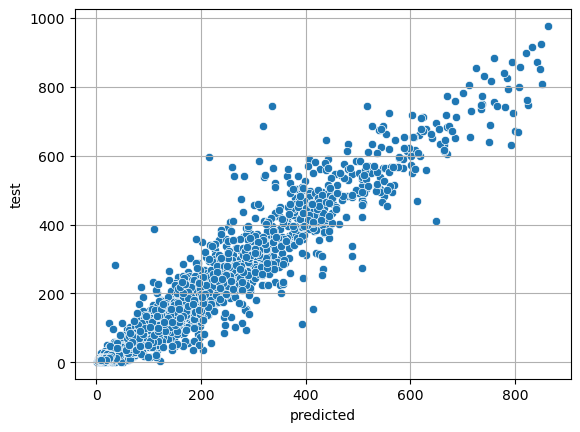

In [136]:
# scatterplot of predicted
sns.scatterplot(x=y_prd1, y=y_test)
plt.xlabel('predicted')
plt.ylabel('test')
plt.grid()
plt.show()

## Check RMSLE 

In [137]:
np.sqrt(mean_squared_log_error(y_test, y_prd1))

0.4582035906169113

## RandomForestRegressor StepbyStep

##define data -- train
X_train_rfr= column_transform.fit_transform(X_train)

##test
X_test_rfr = column_transform.transform(X_test)

#GridSearchCV? ## search for hyperparameter and values using a provided dictionary of parameters

#define dictionay of parameters
parameters = { 'n_estimators' : [2 ** i for i in range(3, 5)],  # parameters grid range(3,9), max_depth : [2, 4, 8, 16, 32, None]
              'max_depth': [2, 4, 8, 16, None]
    

}


parameters

 #initialize the model
rfr = RandomForestRegressor()

#get parameters keys
rfr.get_params().keys();

#define a grid search
grid_cv = GridSearchCV(estimator=rfr, 
                    param_grid=parameters, 
                    cv=5, 
                    scoring='r2',
                    verbose = 3)

#train the model

grid_cv.fit(X_train_rfr, y_train)

##define a function to print the result out
def print_results(results):
    print('BEST MODEL PARAMETERS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    for mean, params in zip(means, results.cv_results_['params']):
        print('{}  for {}'.format(round(mean, 4), params))

#Print results
print_results(grid_cv)


#Get the best hyperparameters
grid_cv.best_params_ 

In [138]:
# Collect and examine all the results

results = pd.DataFrame(grid_cv.cv_results_)

results.head()

#score of the model train data
rfr.score(X_train_rfr, y_train)

#score of the model test data
rfr.score(X_test_rfr, y_test)

#cross validation
cross_r2_rfr = cross_val_score(rfr,  #the model that we want to evaluate
                               
                               X_train_rfr, # X_train data
                               y_train,    # ytrain
                               cv=5,      # the number of folds that you want
                               scoring ='r2',  # the metric that you want to evaluate
                               verbose=3, # this prints our progress, more information
                              n_jobs=cores_to_use) 

cross_r2_rfr ## a robust model should have approximate score for each cv

cross_r2_rfr.mean()  ### give the score of the model

rfr_best = grid_cv.best_estimator_
rfr_best

y_prd = rfr_best.predict(X_test_rfr)

#Plot prediction vs test data

sns.scatterplot(x=y_prd, y=y_test)
plt.xlabel('predicted')
plt.ylabel('test')
plt.show()

In [ ]:
#Homoscedasticity
# Homoscedasticity means that the residuals have the same variance for all values of X. 
# Lack of it (heteroscedasticity) means there may be patterns undescribed by your model.
# You can check for homoscedasticity by plotting the residuals against X. You should see random noise
#plt.plot(X_train[:, 0], residuals)

#Check assumption - Zero Conditional Mean: ---If the residuals grow with any of your input variables, 
#this assumption is violated. Plotting the correlations with your residuals helps to find out:
fig = plt.figure(figsize=(8, 6))
sns.residplot(data=bike_train, x='temp', y='count') ##residplot show the difference between the observed value and 
                                                    #the predicted value from linear egression model
plt.show()

In [ ]:
## Check Prediction residuals

In [ ]:
###Homoscedasticity
#plt.plot(X[:, 0], residuals)

In [ ]:
#from scipy.stats import probplot
#import matplotlib.pyplot as plt

#probplot(residuals, plot=plt)

In [ ]:
#from scipy.stats import jarque_bera
#jarque_bera(residuals)

In [ ]:
#Normally Distributed Residuals
#residuals.hist()

In [ ]:
###Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i)
           for i in range(X.shape[1])],
          index=X.columns)

In [ ]:
##Auto correlation residual
##ACF or a Durbin Watson test

In [ ]:
#Feature Expansion Strategies

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures

m = PolynomialFeatures(degree=3)
m.fit_transform(X)

In [ ]:
#

Transform the target column